In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

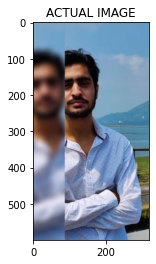

In [2]:
imag = cv2.imread('picture.jpg')
img = cv2.cvtColor(imag, cv2.COLOR_BGR2RGB)
plt.title('ACTUAL IMAGE')
plt.imshow(img)

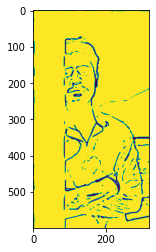

In [3]:
line_size = 7
blur_value = 7
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_blur = cv2.medianBlur(gray, blur_value)
edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
plt.imshow(edges)

In [4]:
def color_quantization(img, k):
# Transform the image
  data = np.float32(img).reshape((-1, 3))

# Determine criteria
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

# Implementing K-Means
  ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)
  result = center[label.flatten()]
  result = result.reshape(img.shape)
  return result

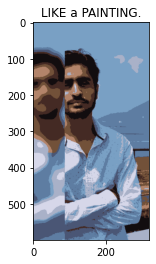

In [5]:
total_color = 9
img = color_quantization(img, total_color)
plt.title('LIKE a PAINTING.')
plt.imshow(img)

In [6]:
blurred = cv2.bilateralFilter(img, d=7, sigmaColor=200,sigmaSpace=200)
cartoon = cv2.bitwise_and(blurred, blurred, mask=edges)

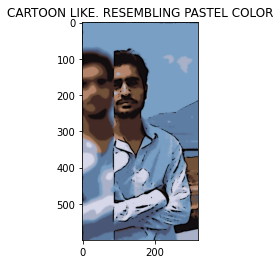

In [7]:
plt.title('CARTOON LIKE. RESEMBLING PASTEL COLOR')
plt.imshow(cartoon)